<div style="text-align: center;">
  <h1>Machine Learning Project 1</h1>
  <h2><em>Jonathan Chacko Pattasseril</em></h2>
  <p><code>Marine Data Analysis</code></p>
</div>

# Libaries & Initialization

In [397]:
# !pip install scikit-learn pandas numpy matplotlib seaborn python-dotenv # !pip install --upgrade scikit-learn pandas numpy matplotlib seaborn python-dotenv

In [398]:
from scipy.stats import chisquare, chi2_contingency, ttest_ind # Used for Statistical Analysis
import requests, sys, os, warnings
import matplotlib.pyplot as plt # Used for Data Visualization
from dotenv import load_dotenv # Used for Environment Variables
import seaborn as sns # Used for Data Visualization
import pandas as pd # Used for Data Table's & Data Manipulation
import numpy as np # Used for Data Manipulation

In [399]:
# First we are going to make sure the Warnings are ignored, this is to avoid any unnecessary warnings in the output.
warnings.filterwarnings('ignore')

# Then I'm loading the Environment Variables from the .env file, if the file is not found then the code will stop execution.
try:
    if not load_dotenv():
        # raise FileNotFoundError(".env file not found")
        sys.exit("Stopping execution as environment variables are required")
    # else:
    #     load_dotenv()
    #     # print(".env file loaded successfully")
except Exception as e:
    print(f"Error loading .env file: {e}")
    # raise SystemExit("Stopping execution as environment variables are required")
    sys.exit("Stopping execution as environment variables are required")
else:
    if os.getenv("API_KEY") is None:
        sys.exit("Stopping execution as required environment variables are not set")
finally:
    load_dotenv()
    print("Environment variables loaded successfully!")

Environment variables loaded successfully!


---

# Dataset Selection and Preliminary Research
- Select a dataset of interest from a public data repository.
- Conduct preliminary research to understand the dataset’s context and potential
questions to explore.

#### Potential Questions we will explore &or answer:

1. What is the Data's Structure <!-- [What is the Data's Structure](#q-01) -->

2. How many Empty/Error Values are there and how to Clean it (Applicable for Analysis Only)
3. How to Fill Up Date Values without Changing the Integrity &or Order of Data
4. Check Clean & Fill Nessary Port Details with Reference to columns which have a Direct Correlation to it.

5. Understanding the Correlation of data for IMPORTS & EXPORTS

6. Are sailing transactions uniformly distributed across all 12 months, or do seasonal patterns exist?
7. Is there an association between origin and destination locations in the discharge data, or are they independent?
8. Is there a statistically significant difference in the average transaction month between discharge and sailing operations?

9. Understand the Container Stock Increasing/Decreasing to Find which Month’s of the Year had least & Most Stock of a Particular Container Type
10. Understanding how many Containers where in a Country at a Given point in Time
11. Monthly Distribution of Discharge & Sailing Containers for the Company
- & more...


## Calling the Data

For my Data Set I Created an API on my Company's Server (with their Permission)
to Analyse, Clean and Visualize the Data.

This Data is something I have Structured Tables for & worked with over the Few Years
My Goal is to Analyse the Data and hopefully provide some Useful Insights for the Company.

In [400]:
# API Connection to get the data & Create a DataFrame
rest_api = True # Boolean for in case i change the Structure of the API on System side.
domain = "https://smooth-ocean.tech/" # Domain of the API
app = "gmac-operations/" # Application Name
extension = "seneca_jcp_mss/api/" # Extension of the API
url = domain + app + extension # URL of the API

# Data to be sent to the API
data = {
    "auth": os.getenv("API_KEY"), # API Key to Authenticate the User taken from the Environment Variables stored in the .env file
}

if rest_api: # Data to be sent to the API in case of POST request
    """
    We can add more parameters to the data to get more specific data
    For Example, we can add the country name to get the data of a specific country
    We can also add the flag_history to get the history of the data
    About The Parameters
    - Country can be Formatted as List or CSV String (Default gives Data of Both Countries if None is Provided)
    - flag_history can be True or False (Default gives Both Current & History Data if None is Provided)
    """
    data.update({
        "country": [
            "SAUDI ARABIA",
            # "KUWAIT",
        ],
        # "flag_history": False
    })

# Getting the Data from the API
response = requests.post(url, json=data) if rest_api else requests.post(url, headers=data) 

if response.status_code == 200: # If the API Response is Successful
    data = response.json()
    df = pd.DataFrame(data)
else: # If the API Response is not Successful
    print(response.status_code)
    df = pd.DataFrame()


if df.empty: # If the DataFrame is Empty
    sys.exit(f"No Data Found | Check API Response ~ {response.json()}")
else: # For Privacy Reasons, Dropping the Client Name & Principal Names.
    df = df.drop(['CLIENT_NAME', 'PRINCIPAL_NAMES', 'added_by'], axis=1)

# df.to_csv("Seneca_Containers.csv", index=False) # Uncomment to save the Data to a CSV File
df # Uncomment to see the whole DataFrame but i dont advise it as it is very large

,id,LOCATION_NAME,BOOKING_NO,CONTAINER_SIZE,DESTINATION_AGENT,DISCHARGE_STATUS,LOADING_STATUS,DISCHARGE_DATE,DISCHARGE_AT_ICD,DO_DATE,...,SLOT_OPERATOR_EXPORT,DEPOT_NAME,DEPOT_FREE_TIME,flag_history,session_id,added_on,CONTAINER_NUMBER,CONTAINER_TYPE,IMP_VESSEL_VOY,EXP_VESSEL_VOY
0,94027,SAUDI ARABIA,None,20,None,None,None,2024-04-03,None,2025-02-03,...,None,None,None,False,d53490bf-0449-4f40-b686-62dc44830bc4,2024-10-24,EGHU3101321,DV,DARK OCEAN 02410,None
1,94028,SAUDI ARABIA,None,20,None,None,None,2024-04-03,None,2024-04-06,...,None,None,None,False,d53490bf-0449-4f40-b686-62dc44830bc4,2024-10-24,TTNU3221003,DV,DARK OCEAN 02410,None
2,94029,SAUDI ARABIA,None,20,None,None,None,2024-05-03,None,2024-05-09,...,None,None,None,False,d53490bf-0449-4f40-b686-62dc44830bc4,2024-10-24,CLSU2112812,DV,SIDRA AHLAM TRS2404,None
3,94030,SAUDI ARABIA,None,40,None,None,None,2024-05-03,None,2024-05-29,...,None,None,None,False,6d4898a5-33a1-40e6-97fe-aa35bcfb3dbb,2024-10-24,CLSU4000787,HC,SIDRA AHLAM TRS2404,None
4,94031,SAUDI ARABIA,None,20,None,None,None,2024-02-08,None,2024-02-11,...,None,None,None,False,7916d06d-fe7c-4d09-8307-0aa65a24ec2c,2025-02-10,CLSU2117218,DV,nan nan,nan nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,123521,SAUDI ARABIA,None,20,None,FULL,None,2024-10-23,None,None,...,None,None,None,True,a3b0e2a8-4364-4cbf-b651-65f891d9b8fc,2024-12-01,TEMU4065089,GP,AL RAWDAH/005E,None
8668,123522,SAUDI ARABIA,None,20,None,FULL,None,2024-10-23,None,None,...,None,None,None,True,9989218c-c483-43d1-a024-3f24b9a18891,2024-12-01,FCIU2488553,GP,AL RAWDAH/005E,None
8669,123523,SAUDI ARABIA,None,20,None,FULL,None,2024-10-23,None,None,...,None,None,None,True,395967f4-75a6-449b-9845-7921916d730b,2024-12-01,AXIU8484377,GP,AL RAWDAH/005E,None
8670,124064,SAUDI ARABIA,None,20,None,None,None,2024-04-08,2024-04-08,None,...,None,None,None,True,345de4ed-7649-4bb3-82f3-8a972cd74c4b,2024-11-18,CCLU3882331,GP,WADI DUKA/2405W,EA BLUE NILE 24008


## Understanding the Data
<a name="q-01" id="q-01"></a>

In [401]:
df.shape                    # Getting the Shape of the DataFrame in (Rows, Columns) format

(8672, 49)

In [402]:
df.columns # Gets the Columns of the DataFrame

Index(['id', 'LOCATION_NAME', 'BOOKING_NO', 'CONTAINER_SIZE',
       'DESTINATION_AGENT', 'DISCHARGE_STATUS', 'LOADING_STATUS',
       'DISCHARGE_DATE', 'DISCHARGE_AT_ICD', 'DO_DATE', 'SAILING_DATE',
       'IMPORT_BL_NUMBER', 'IMP_POL', 'IMP_POD', 'IMP_FPOD',
       'FREE_DAYS_IMPORT', 'IMPORT_FULL_DAYS', 'EMPTY_FULL',
       'EMPTY_IDLING_DAYS', 'SNTC_DATE', 'SNTS_DATE', 'RCVC_DATE', 'RCVS_DATE',
       'RAILED_IN', 'RAILED_OUT', 'EXPORT_BL_NUMBER', 'EXP_POL', 'EXP_POD',
       'EXP_FPOD', 'FREE_DAYS_EXPORT', 'SRR_NO', 'DM_AV_UR', 'SOC', 'ISO_Code',
       'GRADE', 'TERMINAL', 'DROPPED', 'REMARKS', 'SLOT_OPERATOR_IMPORT',
       'SLOT_OPERATOR_EXPORT', 'DEPOT_NAME', 'DEPOT_FREE_TIME', 'flag_history',
       'session_id', 'added_on', 'CONTAINER_NUMBER', 'CONTAINER_TYPE',
       'IMP_VESSEL_VOY', 'EXP_VESSEL_VOY'],
      dtype='object')

`How Many Null Values`
<a name="q-02-a" id="q-02-a"></a>

In [403]:
df = df.filter([
    'LOCATION_NAME', # 'CLIENT_NAME', 'PRINCIPAL_NAMES', 
    'CONTAINER_NUMBER', 'CONTAINER_TYPE', 'CONTAINER_SIZE',
    'DISCHARGE_DATE', 'IMPORT_BL_NUMBER', 'IMP_POL', 'IMP_POD', 'IMP_FPOD', 'IMP_VESSEL_VOY',
    'SAILING_DATE', 'EXPORT_BL_NUMBER', 'EXP_POL', 'EXP_POD', 'EXP_FPOD', 'EXP_VESSEL_VOY',
    'DO_DATE', 'SNTC_DATE', 'SNTS_DATE', 'RCVC_DATE', 'RCVS_DATE',
    'REMARKS', 'flag_history',
    'added_on', 'session_id' # 'added_by', 
], axis=1) # Im Filtering the Columns to get only the required Columns which we need to work on as the DataFrame is very large and has alot of Columns we dont need

# Creating a Function to get the Columns with Null Values
def get_null_col_count(df, showAll=False):
    if showAll:
        # return df.isnull().sum()
        print(df.isnull().sum())
    else:
        for col, idx in df.isnull().sum().items():
            if idx > 0:
                print(col, idx)

# Getting ALL the Columns with Null Values
df.isnull().sum() # get_null_col_count(df)

LOCATION_NAME          0
CONTAINER_NUMBER       0
CONTAINER_TYPE         0
CONTAINER_SIZE         0
DISCHARGE_DATE       837
IMPORT_BL_NUMBER     492
IMP_POL              776
IMP_POD             1760
IMP_FPOD            7203
IMP_VESSEL_VOY       432
SAILING_DATE        2999
EXPORT_BL_NUMBER    4710
EXP_POL             6117
EXP_POD             5241
EXP_FPOD            7331
EXP_VESSEL_VOY      2566
DO_DATE             6917
SNTC_DATE           1734
SNTS_DATE           3634
RCVC_DATE           1804
RCVS_DATE           3950
REMARKS             5431
flag_history           0
added_on               0
session_id           159
dtype: int64

In [404]:
df.info() # Getting the Information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LOCATION_NAME     8672 non-null   object
 1   CONTAINER_NUMBER  8672 non-null   object
 2   CONTAINER_TYPE    8672 non-null   object
 3   CONTAINER_SIZE    8672 non-null   int64 
 4   DISCHARGE_DATE    7835 non-null   object
 5   IMPORT_BL_NUMBER  8180 non-null   object
 6   IMP_POL           7896 non-null   object
 7   IMP_POD           6912 non-null   object
 8   IMP_FPOD          1469 non-null   object
 9   IMP_VESSEL_VOY    8240 non-null   object
 10  SAILING_DATE      5673 non-null   object
 11  EXPORT_BL_NUMBER  3962 non-null   object
 12  EXP_POL           2555 non-null   object
 13  EXP_POD           3431 non-null   object
 14  EXP_FPOD          1341 non-null   object
 15  EXP_VESSEL_VOY    6106 non-null   object
 16  DO_DATE           1755 non-null   object
 17  SNTC_DATE     

In [405]:
df.describe(include='all').T # Getting the Description of the DataFrame

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LOCATION_NAME,8672,1,SAUDI ARABIA,8672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTAINER_NUMBER,8672,7573,DOLU2010811,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTAINER_TYPE,8672,16,DV,2474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTAINER_SIZE,8672.0,NaN,NaN,NaN,25.970941,9.15798,0.0,20.0,20.0,40.0,40.0
DISCHARGE_DATE,7835,619,2022-11-13,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMPORT_BL_NUMBER,8180,3105,ACLSOKJED693422,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP_POL,7896,93,JEA,1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP_POD,6912,29,RSGT JED,1374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP_FPOD,1469,19,RSGT,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMP_VESSEL_VOY,8240,1095,nan nan,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# Data Cleaning and Preprocessing
- Use Pandas (or anything else you wish) to clean the dataset, handling missing
values, outliers, and incorrect data types.
- Perform necessary data transformations to prepare the dataset for analysis.

## What must be Cleaned
> As Understood from Above the Data has ALOT of Null Values which needs to be cleaned.
<br>For Our Goals we must Clean the Data and Remove the Columns which are not Required.

In [406]:
axis = 0 # Used for Later as a parameter in Deciding how I’m going to clean the Data

For the First Layer of Cleaning i will Clean Up the Important Date Values in the Data Frame
These are (in order):
1. Discharge Date (Date it **Arrives** at Location)
2. DO Date (DO - `Delivery Order`)
3. SNTC Date (`SNTC` - **Sent for Container**)
4. SNTS Date (`SNTS` - **Sent for Store**)
5. RCVC Date (`RCVC` - **Received Container**)
6. RCVS Date (`RCVS` - **Received Store**)
7. Sailing Date  (Date it **Leaves** a Location)

In [407]:
'''
I'm Taking all the Columns in the Order of the Dates from First Arriving to Last when it Leaves
The Order is as Follows: DISCHARGE_DATE -> DO_DATE -> SNTC_DATE -> SNTS_DATE -> RCVC_DATE -> RCVS_DATE -> SAILING_DATE
Our Goal is to make Sure the DISCHARGE_DATE & SAILING_DATE is not Null
'''
fillerDf = df[['DISCHARGE_DATE','DO_DATE', 'SNTC_DATE', 'SNTS_DATE', 'RCVC_DATE', 'RCVS_DATE','SAILING_DATE']]
fillerDf.filter(['DISCHARGE_DATE', 'SAILING_DATE']).isnull().sum() # Getting the Null Values in the Columns we need to fill

DISCHARGE_DATE     837
SAILING_DATE      2999
dtype: int64

In [408]:
fillerDf

,DISCHARGE_DATE,DO_DATE,SNTC_DATE,SNTS_DATE,RCVC_DATE,RCVS_DATE,SAILING_DATE
0,2024-04-03,2025-02-03,2025-02-04,2025-02-06,2025-02-05,2024-09-22,None
1,2024-04-03,2024-04-06,2025-02-04,2025-02-06,2025-02-05,2024-09-22,None
2,2024-05-03,2024-05-09,2024-05-13,2025-02-05,2024-05-13,2025-02-06,None
3,2024-05-03,2024-05-29,2024-06-04,2024-09-24,2024-06-04,2024-09-21,None
4,2024-02-08,2024-02-11,2024-02-14,None,2024-02-14,2024-09-23,None
...,...,...,...,...,...,...,...
8667,2024-10-23,None,None,None,2024-10-28,None,2024-10-28
8668,2024-10-23,None,None,None,2024-10-28,None,2024-10-28
8669,2024-10-23,None,None,None,2024-10-31,None,2024-10-31
8670,2024-04-08,None,None,None,None,None,2024-05-23


In [409]:
'''
If a User Explores the Data he will Notice 
that there are some Dates in Year 1690 which is a Flag Value in the Database 
so I'm going to Nullify those Dates.
'''
def check_and_nullify_date(date):
    if date is not None and len(date) >= 4:
        year = int(date[:4])
        if year < 1691: # 1690 is a Flag Value in Database.
            # print(date)
            return None
    return date
fillerDf = fillerDf.applymap(check_and_nullify_date)
fillerDf

,DISCHARGE_DATE,DO_DATE,SNTC_DATE,SNTS_DATE,RCVC_DATE,RCVS_DATE,SAILING_DATE
0,2024-04-03,2025-02-03,2025-02-04,2025-02-06,2025-02-05,2024-09-22,None
1,2024-04-03,2024-04-06,2025-02-04,2025-02-06,2025-02-05,2024-09-22,None
2,2024-05-03,2024-05-09,2024-05-13,2025-02-05,2024-05-13,2025-02-06,None
3,2024-05-03,2024-05-29,2024-06-04,2024-09-24,2024-06-04,2024-09-21,None
4,2024-02-08,2024-02-11,2024-02-14,None,2024-02-14,2024-09-23,None
...,...,...,...,...,...,...,...
8667,2024-10-23,None,None,None,2024-10-28,None,2024-10-28
8668,2024-10-23,None,None,None,2024-10-28,None,2024-10-28
8669,2024-10-23,None,None,None,2024-10-31,None,2024-10-31
8670,2024-04-08,None,None,None,None,None,2024-05-23


In [410]:
# Transposing the DataFrame (approach decided by the axis variable)
fillerDf = fillerDf.T if axis == 0 else fillerDf
fillerDf

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
DISCHARGE_DATE,2024-04-03,2024-04-03,2024-05-03,2024-05-03,2024-02-08,2024-06-21,2024-05-03,2024-06-21,2024-05-03,2024-05-03,...,2024-09-24,2024-10-01,2024-10-01,2024-10-01,2024-10-01,2024-10-23,2024-10-23,2024-10-23,2024-04-08,2024-09-08
DO_DATE,2025-02-03,2024-04-06,2024-05-09,2024-05-29,2024-02-11,2024-07-08,2025-02-03,2024-06-27,2024-05-15,None,...,None,None,None,None,None,None,None,None,None,None
SNTC_DATE,2025-02-04,2025-02-04,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,None,...,None,None,None,None,None,None,None,None,None,None
SNTS_DATE,2025-02-06,2025-02-06,2025-02-05,2024-09-24,None,2024-09-22,None,2024-09-22,2024-09-22,None,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,None,None,None,None,2024-12-10
RCVC_DATE,2025-02-05,2025-02-05,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,None,...,2024-10-03,2024-10-07,2024-10-06,2024-10-08,2024-10-08,2024-10-28,2024-10-28,2024-10-31,None,None
RCVS_DATE,2024-09-22,2024-09-22,2025-02-06,2024-09-21,2024-09-23,2024-09-22,2024-09-21,2024-09-22,2024-09-22,None,...,None,None,None,None,None,None,None,None,None,2024-12-02
SAILING_DATE,None,None,None,None,None,None,None,None,None,None,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-09-06


In [411]:
# Filling the Dates with the Previous Dates as the Dates are in Order of Arrival to Exit
fillerDf = fillerDf.fillna(
    method='bfill',
    axis=axis
) # backwards-fill to fill Discharge Date
fillerDf

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
DISCHARGE_DATE,2024-04-03,2024-04-03,2024-05-03,2024-05-03,2024-02-08,2024-06-21,2024-05-03,2024-06-21,2024-05-03,2024-05-03,...,2024-09-24,2024-10-01,2024-10-01,2024-10-01,2024-10-01,2024-10-23,2024-10-23,2024-10-23,2024-04-08,2024-09-08
DO_DATE,2025-02-03,2024-04-06,2024-05-09,2024-05-29,2024-02-11,2024-07-08,2025-02-03,2024-06-27,2024-05-15,None,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTC_DATE,2025-02-04,2025-02-04,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,None,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTS_DATE,2025-02-06,2025-02-06,2025-02-05,2024-09-24,2024-02-14,2024-09-22,2024-05-07,2024-09-22,2024-09-22,None,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
RCVC_DATE,2025-02-05,2025-02-05,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,None,...,2024-10-03,2024-10-07,2024-10-06,2024-10-08,2024-10-08,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
RCVS_DATE,2024-09-22,2024-09-22,2025-02-06,2024-09-21,2024-09-23,2024-09-22,2024-09-21,2024-09-22,2024-09-22,None,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
SAILING_DATE,None,None,None,None,None,None,None,None,None,None,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-09-06


In [412]:
'''
We can work on the Assumption that if the Forward Values are Empty after doing the Back Fill
it's Most Likely a Current Container (which means that the Container is still at the given Location)
to Signify that it's still at the Location we can fill the Dates with TODAY() 
as the Container is still at the Location as of Today.
'''
fillerDf = fillerDf.fillna(
    pd.Timestamp.now().strftime('%Y-%m-%d') # method='ffill', axis=0 
) # filling the rest of the Dates with TODAY() main goal is to fill Sailing Date
fillerDf

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
DISCHARGE_DATE,2024-04-03,2024-04-03,2024-05-03,2024-05-03,2024-02-08,2024-06-21,2024-05-03,2024-06-21,2024-05-03,2024-05-03,...,2024-09-24,2024-10-01,2024-10-01,2024-10-01,2024-10-01,2024-10-23,2024-10-23,2024-10-23,2024-04-08,2024-09-08
DO_DATE,2025-02-03,2024-04-06,2024-05-09,2024-05-29,2024-02-11,2024-07-08,2025-02-03,2024-06-27,2024-05-15,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTC_DATE,2025-02-04,2025-02-04,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTS_DATE,2025-02-06,2025-02-06,2025-02-05,2024-09-24,2024-02-14,2024-09-22,2024-05-07,2024-09-22,2024-09-22,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
RCVC_DATE,2025-02-05,2025-02-05,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,2025-02-12,...,2024-10-03,2024-10-07,2024-10-06,2024-10-08,2024-10-08,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
RCVS_DATE,2024-09-22,2024-09-22,2025-02-06,2024-09-21,2024-09-23,2024-09-22,2024-09-21,2024-09-22,2024-09-22,2025-02-12,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
SAILING_DATE,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-09-06


In [413]:
fillerDf = fillerDf.apply(pd.to_datetime) # Convert all columns to datetime
fillerDf

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
DISCHARGE_DATE,2024-04-03,2024-04-03,2024-05-03,2024-05-03,2024-02-08,2024-06-21,2024-05-03,2024-06-21,2024-05-03,2024-05-03,...,2024-09-24,2024-10-01,2024-10-01,2024-10-01,2024-10-01,2024-10-23,2024-10-23,2024-10-23,2024-04-08,2024-09-08
DO_DATE,2025-02-03,2024-04-06,2024-05-09,2024-05-29,2024-02-11,2024-07-08,2025-02-03,2024-06-27,2024-05-15,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTC_DATE,2025-02-04,2025-02-04,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
SNTS_DATE,2025-02-06,2025-02-06,2025-02-05,2024-09-24,2024-02-14,2024-09-22,2024-05-07,2024-09-22,2024-09-22,2025-02-12,...,2024-10-24,2024-11-30,2024-10-27,2024-10-20,2024-10-20,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-10
RCVC_DATE,2025-02-05,2025-02-05,2024-05-13,2024-06-04,2024-02-14,2024-07-09,2024-05-07,2024-06-27,2024-05-20,2025-02-12,...,2024-10-03,2024-10-07,2024-10-06,2024-10-08,2024-10-08,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
RCVS_DATE,2024-09-22,2024-09-22,2025-02-06,2024-09-21,2024-09-23,2024-09-22,2024-09-21,2024-09-22,2024-09-22,2025-02-12,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-12-02
SAILING_DATE,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,2025-02-12,...,2024-11-02,2024-12-17,2024-11-11,2024-11-04,2024-11-04,2024-10-28,2024-10-28,2024-10-31,2024-05-23,2024-09-06


In [414]:
# Convert the DataFrame back to its Original Shape (approach decided by the axis variable)
fillerDf = fillerDf.transpose() if axis == 0 else fillerDf
fillerDf

,DISCHARGE_DATE,DO_DATE,SNTC_DATE,SNTS_DATE,RCVC_DATE,RCVS_DATE,SAILING_DATE
0,2024-04-03,2025-02-03,2025-02-04,2025-02-06,2025-02-05,2024-09-22,2025-02-12
1,2024-04-03,2024-04-06,2025-02-04,2025-02-06,2025-02-05,2024-09-22,2025-02-12
2,2024-05-03,2024-05-09,2024-05-13,2025-02-05,2024-05-13,2025-02-06,2025-02-12
3,2024-05-03,2024-05-29,2024-06-04,2024-09-24,2024-06-04,2024-09-21,2025-02-12
4,2024-02-08,2024-02-11,2024-02-14,2024-02-14,2024-02-14,2024-09-23,2025-02-12
...,...,...,...,...,...,...,...
8667,2024-10-23,2024-10-28,2024-10-28,2024-10-28,2024-10-28,2024-10-28,2024-10-28
8668,2024-10-23,2024-10-28,2024-10-28,2024-10-28,2024-10-28,2024-10-28,2024-10-28
8669,2024-10-23,2024-10-31,2024-10-31,2024-10-31,2024-10-31,2024-10-31,2024-10-31
8670,2024-04-08,2024-05-23,2024-05-23,2024-05-23,2024-05-23,2024-05-23,2024-05-23


In [415]:
'''
Checking 
if NOT (the Dates are in Order of Arrival to Exit) => then IT CAN BE CONSIDERED AS AN ERROR IN THE DATA
To Rectify this we can fill it with the Same Date as the Discharge Date as it's the First Date in the Order of Arrival to Exit
'''
def check_and_fill_dates(row):
    if row['SAILING_DATE'] <= row['DISCHARGE_DATE']:
        row['DO_DATE'] = row['SNTC_DATE'] = row['SNTS_DATE'] = row['RCVC_DATE'] = row['RCVS_DATE'] = row['SAILING_DATE'] = row['DISCHARGE_DATE']
    return row
fillerDf = fillerDf.apply(check_and_fill_dates, axis=1)
df.update(fillerDf) # Update the Original DataFrame with the Cleaned Dates
get_null_col_count(df)

IMPORT_BL_NUMBER 492
IMP_POL 776
IMP_POD 1760
IMP_FPOD 7203
IMP_VESSEL_VOY 432
EXPORT_BL_NUMBER 4710
EXP_POL 6117
EXP_POD 5241
EXP_FPOD 7331
EXP_VESSEL_VOY 2566
REMARKS 5431
session_id 159


For the Second Layer of Preprocessing, <br>
Im Going to Fill Up the IMPORTANT NULL Values by Using Columns which are Related to the Column which has the Null Value <br>
My Main Goal is to Fill Up:
> PORT Details (IMP_POL, IMP_POD, IMP_FPOD, EXP_POL, EXP_POD, EXP_FPOD)

In [416]:
def harmonize_vessel_voyages_fast(df):
    """
    Harmonize the Vessel Voyages in the DataFrame
    by filling the missing values with the mode of the respective BL Number
    THE LOGIC IS THAT
    the Vessel Voyage will always be the same for all the Containers with the same BL Number.
    """
    # Harmonize Import Voyage
    imp_mode = df.groupby("IMPORT_BL_NUMBER")["IMP_VESSEL_VOY"].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)
    df["IMP_VESSEL_VOY"] = df["IMPORT_BL_NUMBER"].map(imp_mode)
    # Harmonize Export Voyage
    exp_mode = df.groupby("EXPORT_BL_NUMBER")["EXP_VESSEL_VOY"].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)
    df["EXP_VESSEL_VOY"] = df["EXPORT_BL_NUMBER"].map(exp_mode)
    return df

def fillPortDetails_fast(df, location):
    """
    Fill Up the Important Port Details in the DataFrame
    IMP_POD, IMP_FPOD, EXP_POL
    Most of the time if these Ports are Missing we can fill them up with the the Default Port of the Country OR the Next Port in the Journey of the Container within the Country
    
    Full Forms:
        IMP = IMPORT
        EXP = EXPORT
        POR = PORT OF RECEIPT (Inital Place it started from)
        POL = LOADING PORT (Where it was Loaded to come to the Destination Country)
        POD = DESTINATION PORT (Destination Country's Port)
        FPOD = FINAL DESTINATION (Final Destination of the Container could be a Differnt Port in the Same Country)
    """
    location = location.upper()
    if location == "KUWAIT":
        valid_ports = {"KWSAA", "KWSWK"}
        df["IMP_POD"] = np.where(
            df["IMP_POD"].isin(valid_ports), df["IMP_POD"], np.where(
                df["IMP_FPOD"].isin(valid_ports), df["IMP_FPOD"], np.where(
                    df["EXP_POL"].isin(valid_ports), df["EXP_POL"], "KWSWK"
                )
            )
        )
        df["IMP_FPOD"] = df["IMP_FPOD"].fillna(df["IMP_POD"])
        df["EXP_POL"] = df["EXP_POL"].fillna(df["IMP_FPOD"])
    elif location == "SAUDI ARABIA":
        dammam_ports = {"DAMMAM", "DMM", "SADMM", "SADMN"}
        jeddah_ports = {"JEDDAH", "JED", "RSGT JED", "DPW JED", "M & M JED", "M & M", "RSGT JEDDAH", "SAJED"}
        def standardize(port):
            if port in dammam_ports:
                return "SADMM"
            elif port in jeddah_ports:
                return "SAJED"
            return port  # If it doesn't match, return as is
        df["IMP_POD"] = df["IMP_POD"].apply(standardize)
        df["IMP_FPOD"] = df["IMP_FPOD"].apply(standardize)
        df["EXP_POL"] = df["EXP_POL"].apply(standardize)
        df["IMP_POD"] = np.where(
            df["IMP_POD"].isin({"SADMM", "SAJED"}), df["IMP_POD"],
            np.where(
                df["IMP_FPOD"].isin({"SADMM", "SAJED"}), df["IMP_FPOD"], 
                np.where(df["EXP_POL"].isin({"SADMM", "SAJED"}), df["EXP_POL"], "SAJED")
            )
        )
        df["IMP_FPOD"] = df["IMP_FPOD"].fillna(df["IMP_POD"])
        df["EXP_POL"] = df["EXP_POL"].fillna(df["IMP_FPOD"])
    return df

df = harmonize_vessel_voyages_fast(df)
for temp_df in df.groupby("LOCATION_NAME"):
    df.loc[temp_df[1].index] = fillPortDetails_fast(temp_df[1], temp_df[0])
df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE']) # Incase the Dates are not in Datetime Format
df['SAILING_DATE'] = pd.to_datetime(df['SAILING_DATE']) # Incase the Dates are not in Datetime Format
# df = df[(df['DISCHARGE_DATE'].dt.year == 2024) | (df['SAILING_DATE'].dt.year == 2024)] # Will do this Filter later on in the Analysis
get_null_col_count(df) # This Should Return no more Null Values in IMP_POD, IMP_FPOD, EXP_POL

IMPORT_BL_NUMBER 492
IMP_POL 776
IMP_VESSEL_VOY 494
EXPORT_BL_NUMBER 4710
EXP_POD 5241
EXP_FPOD 7331
EXP_VESSEL_VOY 4809
REMARKS 5431
session_id 159


In [417]:
# Checking if anymore Null Values in the Other Ports which we have no way to Fill Up and Droping those Rows
df = df.dropna(subset=['IMP_POL', 'EXP_POD', 'EXP_FPOD']) # DropRows where IMP_POL, EXP_POD, EXP_FPOD are NULL cause they are Important for the Analysis to be NOT NULL.
get_null_col_count(df) # NOTE: Now BL_Number & the Other Values showing Null Now isnt Important to Fill as they can be Null by their nature.

EXPORT_BL_NUMBER 18
EXP_VESSEL_VOY 18
REMARKS 167


> NOTE: An Alternative Approach to Droping the Row's would be to Fill them with the Mode of the Respective Columns but that would be a Bad Approach as it would be a Guessing Game & would Give us faulty Analyis for what we will do below.

---

# Exploratory Data Analysis
- Conduct an EDA to uncover trends and patterns in the dataset. This may include
    1. Distributions of key variables using histograms.
    2. Relationships between variables using scatter plots and correlation matrices.
    3. Group comparisons using box plots and bar charts.

In [418]:
SELECTED_YEAR = 2024 # Selected Year for the Analysis as it is a Year where the Data is Completed and we can get a Full Picture of Seasonal Trends & Patterns in the Data.

## What must be Analysed
> A few Useful Understandings of the Different Patterns in the Data would be to Understand
1. **IMPORTS** - Understanding from where the Containers are Coming from per month of a Complete Year.
2. **EXPORTS** - Understanding to where the Containers are Going to per month of a Complete Year.

> This will help us to Understand the Patterns of the Containers and the Flow of the Containers in the World.
<br>
> We are from here on going to take only Data of a Particular Year (a Completed Year) which will give us the Data/Analysis we need.

`First we Filter the Data to Only what we need to Analyise`

In [419]:
FILTER = [
    'PRIMARY_LOCATION', 
    'TRANSACTION_MONTH', 'FROM_LOC', 'TO_LOC', 'CONTAINER_NUMBER'
] # Creating a Filter to get the Required (renamed) Columns for the Analysis

result_df = df[[
    "CONTAINER_NUMBER", "LOCATION_NAME",
    "DISCHARGE_DATE", "IMP_POL", "IMP_POD", # "IMP_FPOD",
    "SAILING_DATE", "EXP_POL", "EXP_FPOD", # "EXP_POD",
]] # Getting the Required Columns for the Analysis

result_df = result_df[ # Filtering the Data for the Selected Year
    (result_df["DISCHARGE_DATE"].dt.year == SELECTED_YEAR) | (result_df["SAILING_DATE"].dt.year == SELECTED_YEAR)
]

result_df.shape # Getting the Shape of the DataFrame in (Rows, Columns) of what is remaning after the Cleaning

(818, 8)

`Then we Split the Data into DISCHARGE & SAILING to Analyse the Data Separately`

In [420]:
discharge = result_df.rename( # IMPORTS
    columns={
        "DISCHARGE_DATE": "TRANSACTION_DATE",
        "IMP_POL": "FROM_LOC",
        "IMP_POD": "TO_LOC",
        "LOCATION_NAME":"PRIMARY_LOCATION"
    }
)
discharge = discharge[discharge['TRANSACTION_DATE'].dt.year == SELECTED_YEAR]
discharge['TRANSACTION_MONTH'] = discharge['TRANSACTION_DATE'].dt.month
discharge = discharge.filter(FILTER)
discharge

,PRIMARY_LOCATION,TRANSACTION_MONTH,FROM_LOC,TO_LOC,CONTAINER_NUMBER
43,SAUDI ARABIA,4,NSA,SADMM,DAHU8106322
68,SAUDI ARABIA,3,INNSA,SADMM,OOLU8314638
73,SAUDI ARABIA,3,INMUN,SADMM,BAXU5006339
74,SAUDI ARABIA,2,INNSA,SADMM,EGHU9020762
77,SAUDI ARABIA,2,INMUN,SAJED,ILCU5021469
...,...,...,...,...,...
8662,SAUDI ARABIA,9,AEJEA,SADMM,DAHU8107925
8663,SAUDI ARABIA,10,IDBLW,SADMM,KCSU2211558
8664,SAUDI ARABIA,10,IDBLW,SADMM,KCSU2181772
8665,SAUDI ARABIA,10,IDBLW,SADMM,KCSU2171814


In [421]:
sailing = result_df.rename( # EXPORTS
    columns={
        "SAILING_DATE": "TRANSACTION_DATE",
        "EXP_POL": "FROM_LOC",
        "EXP_FPOD": "TO_LOC",
        "LOCATION_NAME":"PRIMARY_LOCATION"
    }
)
sailing = sailing[sailing['TRANSACTION_DATE'].dt.year == SELECTED_YEAR]
sailing['TRANSACTION_MONTH'] = sailing['TRANSACTION_DATE'].dt.month
sailing = sailing.filter(FILTER)
sailing

,PRIMARY_LOCATION,TRANSACTION_MONTH,FROM_LOC,TO_LOC,CONTAINER_NUMBER
3088,SAUDI ARABIA,9,SAJED,AEJEA,CLSU2116989
3091,SAUDI ARABIA,10,SAJED,AEJEA,CLSU4001356
3099,SAUDI ARABIA,11,SADMM,INMUN,NLLU4157323
3102,SAUDI ARABIA,11,SADMM,INMUN,NLLU4156055
3105,SAUDI ARABIA,9,SADMM,INMUN,DAHU8104248
...,...,...,...,...,...
8662,SAUDI ARABIA,11,SADMM,INMUN,DAHU8107925
8663,SAUDI ARABIA,12,SAJED,EGSOK,KCSU2211558
8664,SAUDI ARABIA,11,SAJED,EGSOK,KCSU2181772
8665,SAUDI ARABIA,11,SAJED,EGSOK,KCSU2171814


`We create a Visualization to see the Monthly Demand for/from each Location`

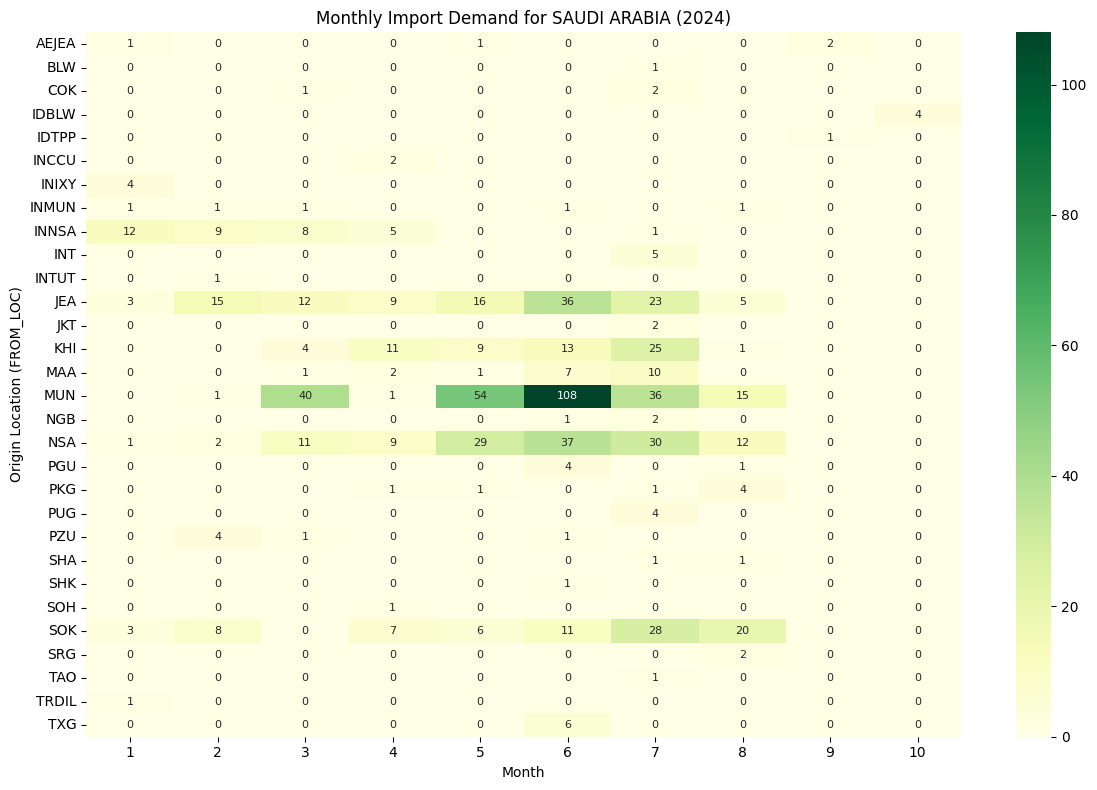

In [422]:
# Group by Month and FROM_LOC to count transactions (for discharge/imports)
monthly_location_demand = discharge.groupby(['PRIMARY_LOCATION', 'TRANSACTION_MONTH', 'FROM_LOC']).size().reset_index(name='TRANSACTION_COUNT')

# Create subplots for each location
unique_locations = monthly_location_demand['PRIMARY_LOCATION'].unique()
fig, axes = plt.subplots(len(unique_locations), 1, figsize=(12, 8 * len(unique_locations)))

# Ensure axes is always a list for easier iteration
if len(unique_locations) == 1:
    axes = [axes]

for idx, location in enumerate(unique_locations):
    # Filter data for current location
    location_data = monthly_location_demand[monthly_location_demand['PRIMARY_LOCATION'] == location]
    
    # Create pivot table for current location
    pivot_table = location_data.pivot_table(
        index='FROM_LOC', 
        columns='TRANSACTION_MONTH', 
        values='TRANSACTION_COUNT',
        fill_value=0
    )
    
    # Plot heatmap with smaller font size and no scientific notation
    sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt='g',  # Use 'g' format to avoid scientific notation
        annot_kws={'size': 8},  # Decrease font size of annotations
        cmap='YlGn',  
        ax=axes[idx]
    )
    
    # Set title and labels
    axes[idx].set_title(f'Monthly Import Demand for {location} ({SELECTED_YEAR})')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Origin Location (FROM_LOC)')

plt.tight_layout()
plt.show()


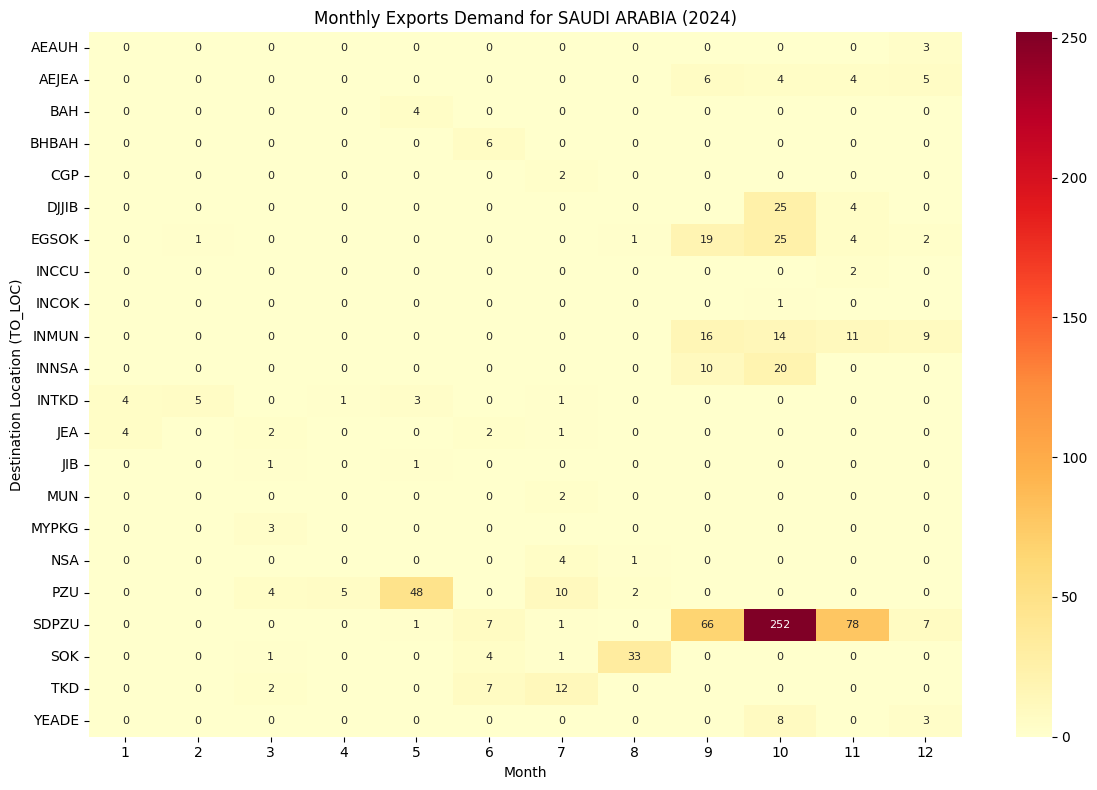

In [423]:
# Group by Month and TO_LOC to count transactions
monthly_location_demand = sailing.groupby(['PRIMARY_LOCATION', 'TRANSACTION_MONTH', 'TO_LOC']).size().reset_index(name='TRANSACTION_COUNT')

# Create subplots for each location
unique_locations = monthly_location_demand['PRIMARY_LOCATION'].unique()
fig, axes = plt.subplots(len(unique_locations), 1, figsize=(12, 8 * len(unique_locations)))

# Ensure axes is always a list for easier iteration
if len(unique_locations) == 1:
    axes = [axes]

for idx, location in enumerate(unique_locations):
    # Filter data for current location
    location_data = monthly_location_demand[monthly_location_demand['PRIMARY_LOCATION'] == location]
    
    # Create pivot table for current location
    pivot_table = location_data.pivot_table(
        index='TO_LOC', 
        columns='TRANSACTION_MONTH', 
        values='TRANSACTION_COUNT',
        fill_value=0
    )
    
    # Plot heatmap with smaller font size and no scientific notation
    sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt='g',  # Use 'g' format to avoid scientific notation
        annot_kws={'size': 8},  # Decrease font size of annotations
        cmap='YlOrRd',  # Changed to a red-based colormap
        ax=axes[idx]
    )
    
    # Set title and labels
    axes[idx].set_title(f'Monthly Exports Demand for {location} ({SELECTED_YEAR})')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Destination Location (TO_LOC)')

plt.tight_layout()
plt.show()

---

# Statistical Inference
- Formulate one or two hypotheses based on the EDA findings.
- Use SciPy (or anything else you wish) to conduct appropriate statistical analysis.
You could explore SciPy t-tests, chi-square tests, etc.
- Interpret the results of the statistical tests to draw conclusions about the data.

### 1. Chi‐Square Goodness of Fit on TRANSACTION_MONTH (Sailing Data)

#### Purpose and Why It Was Used
This test evaluates whether the observed distribution of sailing transactions across the 12 months is consistent with a uniform (i.e., equal) distribution. In other words, it tests the null hypothesis that transactions occur equally in each month. If there were no seasonal or temporal effects, we would expect about the same number of transactions every month.

#### How the Test Works
- Observed Frequencies: The code groups the sailing data by TRANSACTION_MONTH (months 1 to 12). Months with no transactions are filled with a count of zero.
- Expected Frequencies: Under the null hypothesis of uniformity, the expected count for each month is the total number of sailing records divided by 12.
- Test Statistic: The chi-square statistic sums the squared differences between the observed and expected counts, divided by the expected count for each month. A very large chi-square statistic (and correspondingly very small p-value) indicates a significant deviation from the uniform distribution.

In [424]:
# Ignore this Cell as it is Utilized for the Interpretation of the Data
def statistical_inference_interpretor_1(chi2_stat, p_value):
    """
    Interprets the result of a chi-square test and returns a summary based on the provided chi-square statistic and p-value.
    
    Parameters:
        chi2_stat (float): The chi-square statistic.
        p_value (float): The p-value of the chi-square test.
    
    Returns:
        str: An interpretation of the test results.
    """
    if p_value < 0.05:
        if chi2_stat > 1000:
            return (
                f"Chi-square Statistic: {chi2_stat:.2f}\n"
                f"P-value: {p_value:.2e}\n\n"
                "The extremely high test statistic and a very small p-value lead us to reject the null hypothesis. "
                "This indicates that the data shows strong evidence of deviation from a uniform distribution, "
                "suggesting significant month-to-month variation."
            )
        else:
            return (
                f"Chi-square Statistic: {chi2_stat:.2f}\n"
                f"P-value: {p_value:.2e}\n\n"
                "Although the test statistic is moderate, the p-value is still very small. "
                "We reject the null hypothesis, indicating that the data is also significantly non-uniform."
            )
    else:
        return (
            f"Chi-square Statistic: {chi2_stat:.2f}\n"
            f"P-value: {p_value:.2e}\n\n"
            "The p-value is not significant. We fail to reject the null hypothesis, "
            "indicating no strong evidence of non-uniformity in the data."
        )

#### Code

In [425]:
interpretation_1 = statistical_inference_interpretor_1(*chisquare( # chi2_stat, p_value = chisquare(
    f_obs=sailing.groupby(
            'TRANSACTION_MONTH'
        ).size().reindex(
            np.arange(1, 13), fill_value=0
    ).values,
    f_exp=np.array(
        [sailing.shape[0] / 12] * 12
    )
))
# print(f"Chi-square Statistic: {chi2_stat}")
# print(f"P-value: {p_value}")

#### Interpretation of the Output
`NOTE: It is given in the Output Cell of the below Print Statement`

In [426]:
print(interpretation_1)

Chi-square Statistic: 1564.48
P-value: 0.00e+00

The extremely high test statistic and a very small p-value lead us to reject the null hypothesis. This indicates that the data shows strong evidence of deviation from a uniform distribution, suggesting significant month-to-month variation.


### 2. Chi‐Square Test of Independence on FROM_LOC vs. TO_LOC (Discharge Data)

#### Purpose and Why It Was Used
This test checks whether there is an association (i.e., dependence) between the origin locations (FROM_LOC) and the destination locations (TO_LOC) in the discharge data. The null hypothesis here is that the two categorical variables are independent—that is, the likelihood of a given destination is the same regardless of the origin.

#### How the Test Works
- Contingency Table: A cross-tabulation (using pd.crosstab) is built where rows represent different FROM_LOC values and columns represent different TO_LOC values.
- Expected Frequencies: For each cell in the table, the expected count is calculated based on the product of its row and column totals divided by the grand total.
- Test Statistic: The chi-square statistic measures the summed squared differences between the observed counts and expected counts (under the assumption of independence), normalized by the expected counts.
- Degrees of Freedom: The number of independent comparisons is given by (number of rows – 1) × (number of columns – 1).

In [427]:
# Ignore this Cell as it is Utilized for the Interpretation of the Data
def statistical_inference_interpretor_2(chi2, p, dof, expected_table):
    """
    Interprets the results of a chi-square test for independence between two location variables.
    
    Parameters:
        chi2 (float): The chi-square test statistic.
        p (float): The p-value from the chi-square test.
        dof (int): Degrees of freedom for the test.
        expected_table: The expected frequencies table under the null hypothesis.
            This can be any representation (e.g., a list of lists, numpy array, pandas DataFrame)
            that displays the expected counts.
    
    Returns:
        str: A textual interpretation of the chi-square test results.
    """
    interpretation = []
    
    # Report the basic test output
    interpretation.append(f"Chi-square Statistic: {chi2:.2f}")
    interpretation.append(f"P-value: {p:.2e}")
    interpretation.append(f"Degrees of Freedom: {dof}\n")
    
    # Provide the interpretation based on the p-value
    if p < 0.05:
        interpretation.append(
            "The extremely low p-value indicates a statistically significant association "
            "between FROM_LOC and TO_LOC. This means that the destination a shipment takes is related to its origin."
        )
    else:
        interpretation.append(
            "The p-value is not low enough to indicate a statistically significant association "
            "between FROM_LOC and TO_LOC. Thus, we do not have sufficient evidence to conclude that the destination "
            "of a shipment is related to its origin."
        )
    
    # # Append the expected frequencies table
    # interpretation.append("\nExpected Frequencies Table:")
    # interpretation.append(str(expected_table))
    
    # Final overall interpretation
    interpretation.append(
        "\nOverall, the test provides evidence that shipments (or container discharges) do not move randomly between "
        "locations but follow specific, non-independent patterns."
    )
    
    return "\n".join(interpretation), expected_table

#### Code

In [428]:
# Create a contingency table
contingency_table = pd.crosstab(discharge['FROM_LOC'], discharge['TO_LOC'])
interpretation_2, expected_table = statistical_inference_interpretor_2(*chi2_contingency(contingency_table))
# chi2, p, dof, expected_table = chi2_contingency(contingency_table)
# print(f"Chi-square Statistic: {chi2}")
# print(f"P-value: {p}")
# print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:\n", expected_table)
print("---------------------------------------------------------------")
contingency_table.T # Transpose the Table to get a Better View of the Data

Expected Frequencies Table:
 [[5.44987147e-01 3.45501285e+00]
 [1.36246787e-01 8.63753213e-01]
 [4.08740360e-01 2.59125964e+00]
 [5.44987147e-01 3.45501285e+00]
 [1.36246787e-01 8.63753213e-01]
 [2.72493573e-01 1.72750643e+00]
 [5.44987147e-01 3.45501285e+00]
 [6.81233933e-01 4.31876607e+00]
 [4.76863753e+00 3.02313625e+01]
 [6.81233933e-01 4.31876607e+00]
 [1.36246787e-01 8.63753213e-01]
 [1.62133676e+01 1.02786632e+02]
 [2.72493573e-01 1.72750643e+00]
 [8.58354756e+00 5.44164524e+01]
 [2.86118252e+00 1.81388175e+01]
 [3.47429306e+01 2.20257069e+02]
 [4.08740360e-01 2.59125964e+00]
 [1.78483290e+01 1.13151671e+02]
 [6.81233933e-01 4.31876607e+00]
 [9.53727506e-01 6.04627249e+00]
 [5.44987147e-01 3.45501285e+00]
 [8.17480720e-01 5.18251928e+00]
 [2.72493573e-01 1.72750643e+00]
 [1.36246787e-01 8.63753213e-01]
 [1.36246787e-01 8.63753213e-01]
 [1.13084833e+01 7.16915167e+01]
 [2.72493573e-01 1.72750643e+00]
 [1.36246787e-01 8.63753213e-01]
 [1.36246787e-01 8.63753213e-01]
 [8.17480720e-

FROM_LOC,AEJEA,BLW,COK,IDBLW,IDTPP,INCCU,INIXY,INMUN,INNSA,INT,...,PUG,PZU,SHA,SHK,SOH,SOK,SRG,TAO,TRDIL,TXG
TO_LOC,,,,,,,,,,,,,,,,,,,,,
SADMM,3,0,0,4,1,2,4,3,34,0,...,0,0,0,0,0,0,1,0,0,0
SAJED,1,1,3,0,0,0,0,2,1,5,...,4,6,2,1,1,83,1,1,1,6


#### Interpretation of the Output
`NOTE: It is given in the Output Cell of the below Print Statement`

In [429]:
print(interpretation_2)

Chi-square Statistic: 373.11
P-value: 2.02e-61
Degrees of Freedom: 29

The extremely low p-value indicates a statistically significant association between FROM_LOC and TO_LOC. This means that the destination a shipment takes is related to its origin.

Overall, the test provides evidence that shipments (or container discharges) do not move randomly between locations but follow specific, non-independent patterns.


### 3. Independent Two-Sample t-Test on TRANSACTION_MONTH (Discharge vs. Sailing)

#### Purpose and Why It Was Used
Here we compare the mean values of the TRANSACTION_MONTH variable between the two groups (discharge and sailing). Although months are naturally categorical, they are treated numerically (from 1 to 12) so that we can compare the average “month” of transactions between these two datasets. The t-test here checks whether there is a statistically significant difference in the timing (as measured by the month number) of transactions between the discharge and sailing operations.

#### How the Test Works
- Test Type: An independent (two-sample) t-test is performed assuming unequal variances (Welch’s t-test).
- Null Hypothesis: The mean transaction month for discharge and sailing data is the same.
- Test Statistic: The t-statistic is calculated by comparing the difference between the two means relative to the variability of the samples. A large magnitude t-statistic (and a small p-value) indicates that the means differ significantly.

In [430]:
# Ignore this Cell as it is Utilized for the Interpretation of the Data
def statistical_inference_interpretor_3(t_stat, p_value):
    """
    Interprets the results of a t-test comparing the mean transaction month for discharge and sailing data.
    
    Parameters:
        t_stat (float): The t-test statistic.
        p_value (float): The p-value from the t-test.
    
    Returns:
        str: An interpretation of the t-test results.
    """
    interpretation = []
    interpretation.append(f"T-test Statistic: {t_stat:.2f}")
    interpretation.append(f"P-value: {p_value:.2e}\n")
    
    # Check significance based on p-value
    if p_value < 0.05:
        interpretation.append(
            "The very large (in absolute value) t-statistic and the p-value essentially zero indicate that there is "
            "a statistically significant difference between the mean transaction month of the discharge data and the sailing data."
        )
        # Interpret the direction of the difference using the sign of the t-statistic.
        if t_stat < 0:
            interpretation.append(
                "The negative sign indicates that the mean month for discharge transactions is lower than (or occurs earlier in) "
                "the year compared to sailing transactions."
            )
        elif t_stat > 0:
            interpretation.append(
                "The positive sign indicates that the mean month for discharge transactions is higher than (or occurs later in) "
                "the year compared to sailing transactions."
            )
    else:
        interpretation.append(
            "With a p-value well above the typical 0.05 threshold, there is no statistically significant difference between "
            "the mean transaction months for discharge and sailing data."
        )
    
    return "\n".join(interpretation)

#### Code

In [431]:
# Extract the numeric series for each group & Perform an independent t-test (if the variances are not assumed equal, set equal_var=False)
interpretation_3 = statistical_inference_interpretor_3(*ttest_ind( # t_stat, p_val = ttest_ind(
    discharge['TRANSACTION_MONTH'], sailing['TRANSACTION_MONTH'], equal_var=False
))
# print("T-test Statistic:", t_stat)
# print("P-value:", p_val)

#### Interpretation of the Output
`NOTE: It is given in the Output Cell of the below Print Statement`

In [432]:
print(interpretation_3)

T-test Statistic: -34.91
P-value: 1.61e-196

The very large (in absolute value) t-statistic and the p-value essentially zero indicate that there is a statistically significant difference between the mean transaction month of the discharge data and the sailing data.
The negative sign indicates that the mean month for discharge transactions is lower than (or occurs earlier in) the year compared to sailing transactions.


---

# Visualization and Presentation of Findings
- Create visualizations to present the findings from the EDA and statistical tests.
- Use Matplotlib and Seaborn to generate clear, informative graphs. Or use
whatever visualization library you wish.

In [433]:
# Make a copy of the relevant columns just to be safe that we don't modify the original DataFrame
data_comparision_df = df[[
    'LOCATION_NAME', 'CONTAINER_NUMBER', # 'CLIENT_NAME', 
    'CONTAINER_SIZE', 'CONTAINER_TYPE', 
    'DISCHARGE_DATE', 'SAILING_DATE'
]].copy()

In [434]:
# Convert date columns to datetime
data_comparision_df['DISCHARGE_DATE'] = pd.to_datetime(data_comparision_df['DISCHARGE_DATE'])
data_comparision_df['SAILING_DATE'] = pd.to_datetime(data_comparision_df['SAILING_DATE'])
# data_comparision_df = data_comparision_df[data_comparision_df['CONTAINER_SIZE'].isin([20, 40])]
data_comparision_df

,LOCATION_NAME,CONTAINER_NUMBER,CONTAINER_SIZE,CONTAINER_TYPE,DISCHARGE_DATE,SAILING_DATE
43,SAUDI ARABIA,DAHU8106322,40,HC,2024-04-13,2025-02-12
68,SAUDI ARABIA,OOLU8314638,40,HC,2024-03-13,2025-02-12
70,SAUDI ARABIA,WCIU8291810,40,HC,2023-06-14,2025-02-12
72,SAUDI ARABIA,FSCU9514479,40,HC,2023-07-29,2025-02-12
73,SAUDI ARABIA,BAXU5006339,40,HC,2024-03-13,2025-02-12
...,...,...,...,...,...,...
8662,SAUDI ARABIA,DAHU8107925,40,HC,2024-09-24,2024-11-02
8663,SAUDI ARABIA,KCSU2211558,20,GP,2024-10-01,2024-12-17
8664,SAUDI ARABIA,KCSU2181772,20,GP,2024-10-01,2024-11-11
8665,SAUDI ARABIA,KCSU2171814,20,GP,2024-10-01,2024-11-04


In [435]:
# +1 for each discharge, -1 for each sailing.
discharge_events = data_comparision_df[['DISCHARGE_DATE', 'LOCATION_NAME', 'CONTAINER_SIZE']].copy()
discharge_events.rename(columns={'DISCHARGE_DATE': 'Date'}, inplace=True)
discharge_events['Count'] = 1
sailing_events = data_comparision_df[['SAILING_DATE', 'LOCATION_NAME', 'CONTAINER_SIZE']].copy()
sailing_events.rename(columns={'SAILING_DATE': 'Date'}, inplace=True)
sailing_events['Count'] = -1
# Combine the events
events = pd.concat([discharge_events, sailing_events], ignore_index=True)
events['Date'] = pd.to_datetime(events['Date'])
events

,Date,LOCATION_NAME,CONTAINER_SIZE,Count
0,2024-04-13,SAUDI ARABIA,40,1
1,2024-03-13,SAUDI ARABIA,40,1
2,2023-06-14,SAUDI ARABIA,40,1
3,2023-07-29,SAUDI ARABIA,40,1
4,2024-03-13,SAUDI ARABIA,40,1
...,...,...,...,...
1755,2024-11-02,SAUDI ARABIA,40,-1
1756,2024-12-17,SAUDI ARABIA,20,-1
1757,2024-11-11,SAUDI ARABIA,20,-1
1758,2024-11-04,SAUDI ARABIA,20,-1


In [436]:
# Group by location, container size, and date (in case there are multiple events on the same day)
grouped_events = events.groupby(['LOCATION_NAME', 'CONTAINER_SIZE', 'Date'])['Count'].sum().reset_index()
# Define the full date range for the selected year
start_date = pd.to_datetime(f'{SELECTED_YEAR}-01-01')
end_date   = pd.to_datetime(f'{SELECTED_YEAR}-12-31')
date_range = pd.date_range(start_date, end_date)
# For each combination of LOCATION_NAME and CONTAINER_SIZE, re-index to daily frequency and compute cumulative sum
cumulative_list = []
for (location, container_size), group in grouped_events.groupby(['LOCATION_NAME', 'CONTAINER_SIZE']):
    # Set the Date as the index and sort
    group = group.set_index('Date').sort_index()
    # Resample to daily frequency: if no event on a day, use 0.
    daily_counts = group['Count'].resample('D').sum().reindex(date_range, fill_value=0)
    # Compute the cumulative sum (i.e. running total)
    cumulative = daily_counts.cumsum().reset_index()
    cumulative.columns = ['Date', 'Cumulative_Count']
    # Add the group identifiers
    cumulative['LOCATION_NAME'] = location
    cumulative['CONTAINER_SIZE'] = container_size
    cumulative_list.append(cumulative)
# Combine all groups into one DataFrame
df_cumulative = pd.concat(cumulative_list, ignore_index=True)
df_cumulative

,Date,Cumulative_Count,LOCATION_NAME,CONTAINER_SIZE
0,2024-01-01,0,SAUDI ARABIA,20
1,2024-01-02,0,SAUDI ARABIA,20
2,2024-01-03,1,SAUDI ARABIA,20
3,2024-01-04,1,SAUDI ARABIA,20
4,2024-01-05,1,SAUDI ARABIA,20
...,...,...,...,...
727,2024-12-27,-12,SAUDI ARABIA,40
728,2024-12-28,-12,SAUDI ARABIA,40
729,2024-12-29,-12,SAUDI ARABIA,40
730,2024-12-30,-12,SAUDI ARABIA,40


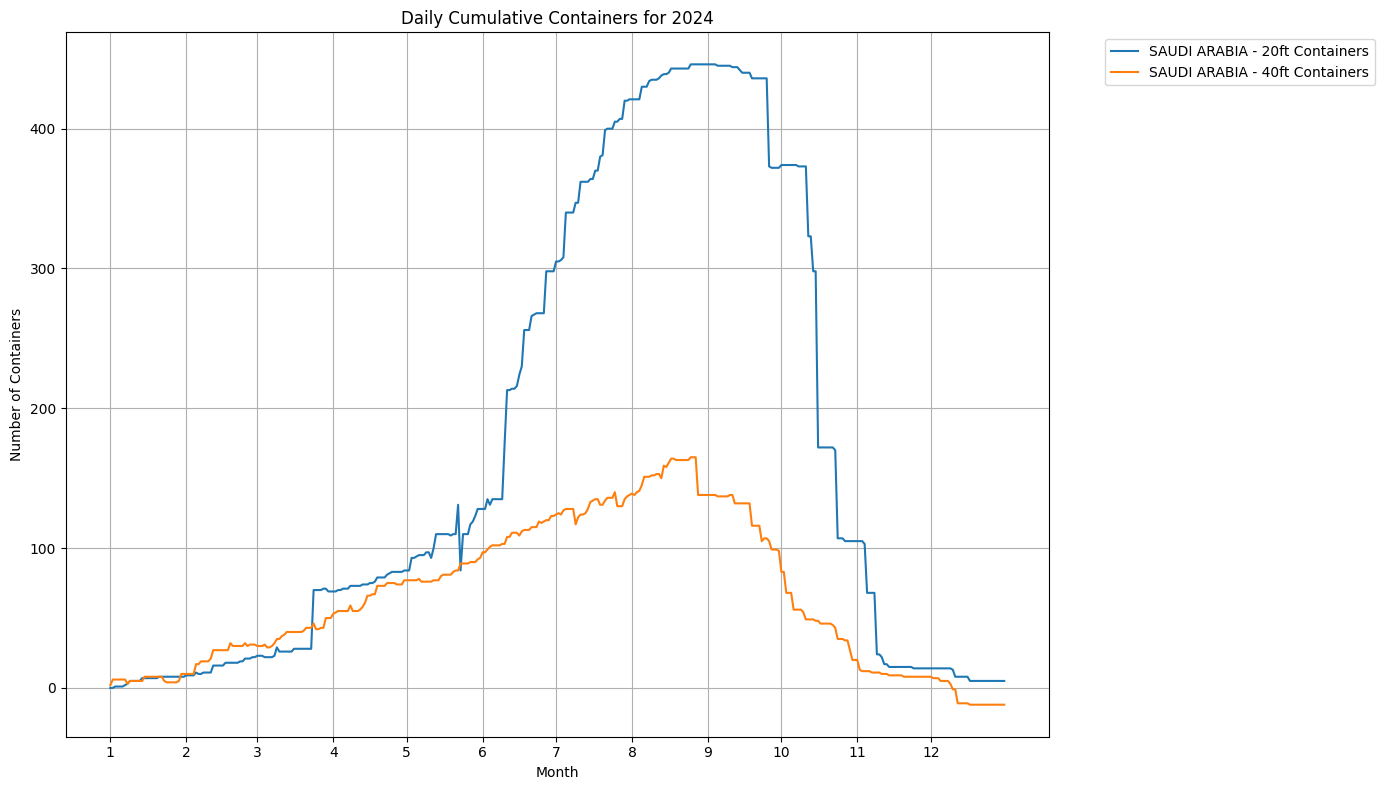

In [437]:
'''
Plotting the Cumulative Containers for the Selected Year
This will give us a better understanding of the Containers coming in and going out of each Locations.
'''
plt.figure(figsize=(14, 8))
# Loop through each unique location and container size, plotting each line on the same figure
for location in df_cumulative['LOCATION_NAME'].unique():
    for size in df_cumulative[df_cumulative['LOCATION_NAME'] == location]['CONTAINER_SIZE'].unique():
        subset = df_cumulative[(df_cumulative['LOCATION_NAME'] == location) &
                               (df_cumulative['CONTAINER_SIZE'] == size)]
        label = f"{location} - {size}ft Containers"
        plt.plot(subset['Date'], subset['Cumulative_Count'], label=label)
plt.xlabel("Month")
plt.ylabel("Number of Containers")
plt.title(f"Daily Cumulative Containers for {SELECTED_YEAR}")
# Create a date range for the first day of each month in the selected year
months = pd.date_range(start=f'{SELECTED_YEAR}-01-01', end=f'{SELECTED_YEAR}-12-31', freq='MS')
# Set the ticks to these dates and label them as 1, 2, 3, ..., 12
plt.xticks(months, range(1, 13))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

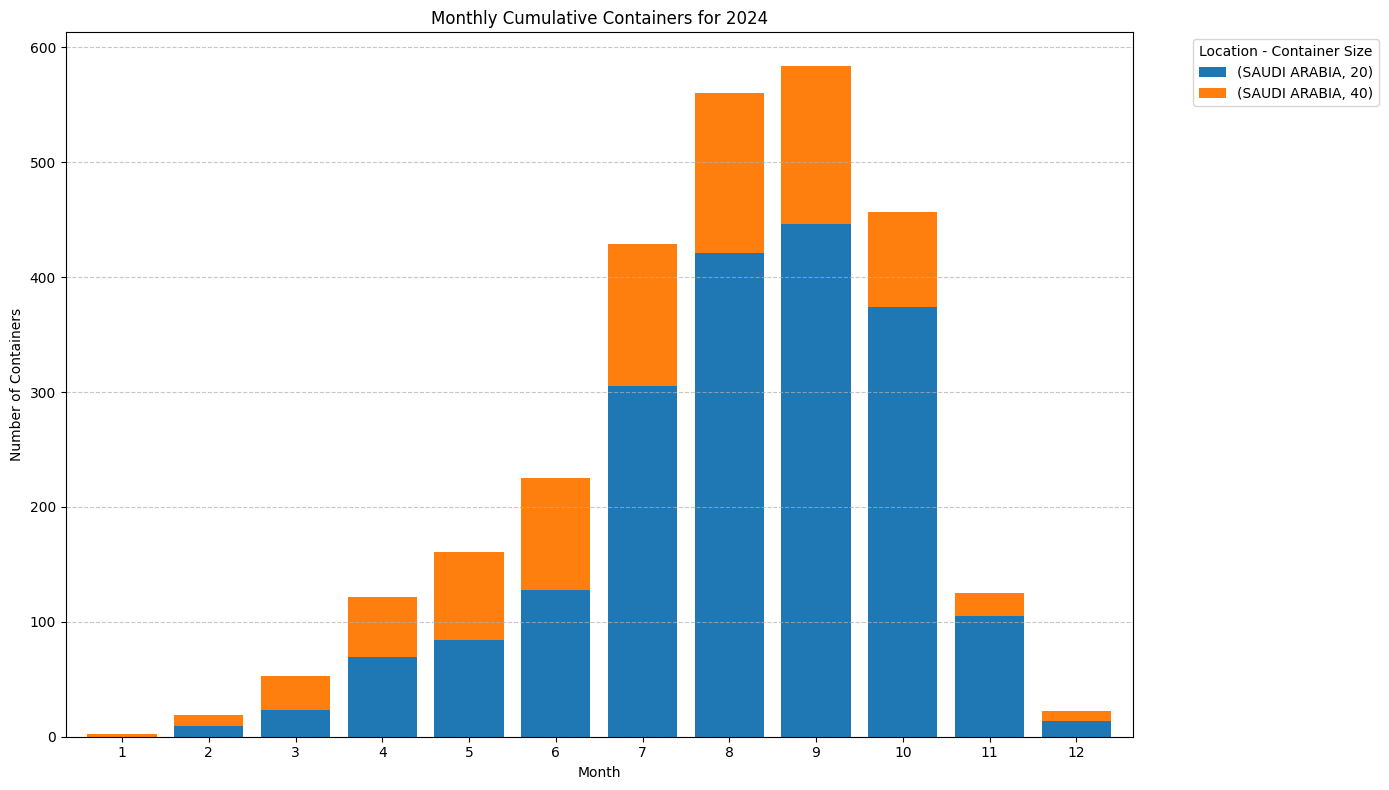

LOCATION_NAME  SAUDI ARABIA     
CONTAINER_SIZE           20   40
Date                            
2024-01-01                0    2
2024-02-01                9   10
2024-03-01               23   30
2024-04-01               69   53
2024-05-01               84   77
2024-06-01              128   97
2024-07-01              305  124
2024-08-01              421  139
2024-09-01              446  138
2024-10-01              374   83
2024-11-01              105   20
2024-12-01               14    8

In [438]:
'''
Understanding the Distribution of Containers by Location and Container Size MONTHLY.
'''
plt.figure(figsize=(14, 8))
# Create a pivot table to organize the data for the bar chart
df_pivot = df_cumulative.pivot_table(
    index='Date', columns=['LOCATION_NAME', 'CONTAINER_SIZE'], values='Cumulative_Count', aggfunc='sum'
)
# Ensure that only the first day of each month is considered
df_pivot = df_pivot[df_pivot.index.isin(pd.date_range(start=f'{SELECTED_YEAR}-01-01', end=f'{SELECTED_YEAR}-12-31', freq='MS'))]
# Plot a stacked bar chart for each month
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel("Month")
plt.ylabel("Number of Containers")
plt.title(f"Monthly Cumulative Containers for {SELECTED_YEAR}")
# Set the x-ticks to 1, 2, ..., 12 representing months
plt.xticks(range(12), range(1, 13), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Location - Container Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df_pivot

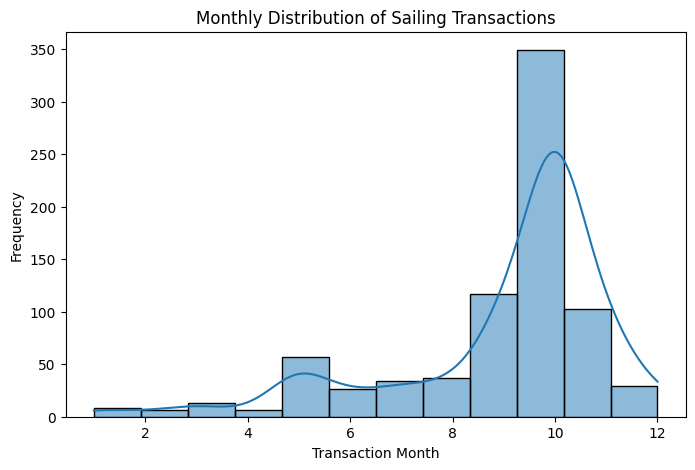

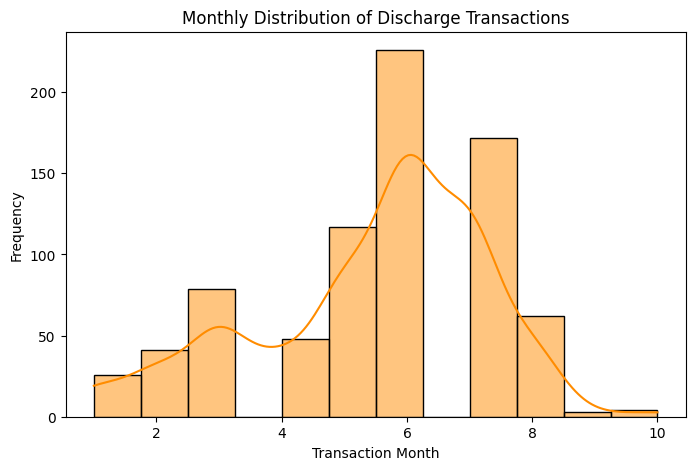

In [439]:
'''
Plotting the Monthly Distribution with KDE (Kernel Density Estimation)
'''
plt.figure(figsize=(8, 5))
sns.histplot(data=sailing, x='TRANSACTION_MONTH', bins=12, kde=True) # sns.countplot(x='TRANSACTION_MONTH', data=sailing, order=np.arange(1, 13), color='blue')
plt.title('Monthly Distribution of Sailing Transactions')
plt.xlabel('Transaction Month')
plt.ylabel('Frequency') # 'Count'
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data=discharge, x='TRANSACTION_MONTH', bins=12, kde=True, color='darkorange') # sns.countplot(x='TRANSACTION_MONTH', data=discharge, order=np.arange(1, 13), color='orange')
plt.title('Monthly Distribution of Discharge Transactions')
plt.xlabel('Transaction Month')
plt.ylabel('Frequency') # 'Count'
plt.show()

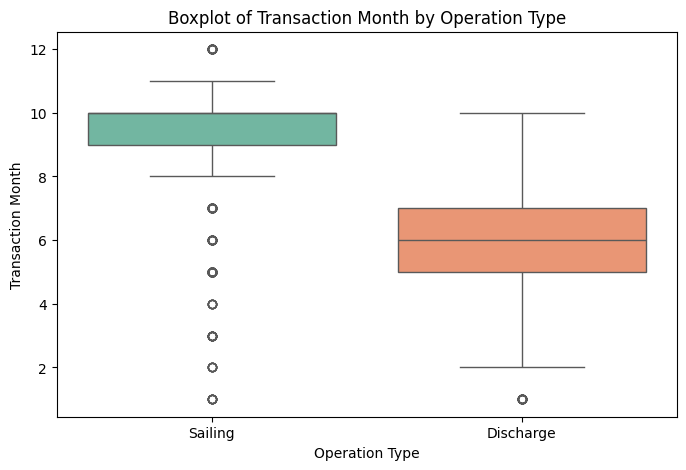

In [440]:
'''
Boxplot Comparing Transaction Months for Sailing vs. Discharge
'''
# Create a new column in each DataFrame to identify the operation type:
sailing_df = sailing.copy()  # (Copy to avoid modifying the original data)
discharge_df = discharge.copy()
sailing_df['Operation'] = 'Sailing'
discharge_df['Operation'] = 'Discharge'
# Combine the two DataFrames:
combined = pd.concat([sailing_df, discharge_df], ignore_index=True) # Use discharge_df for consistency
plt.figure(figsize=(8, 5))
sns.boxplot(x='Operation', y='TRANSACTION_MONTH', data=combined, palette='Set2')
plt.title('Boxplot of Transaction Month by Operation Type')
plt.xlabel('Operation Type')
plt.ylabel('Transaction Month')
plt.show()

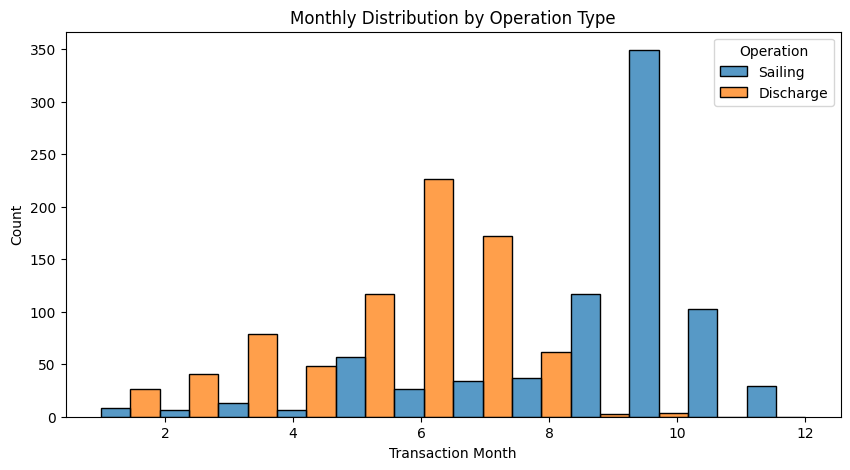

In [441]:
# Side-by-Side Histogram of Monthly Distributions by Operation
plt.figure(figsize=(10, 5))
sns.histplot(data=combined, x='TRANSACTION_MONTH', hue='Operation', multiple='dodge', bins=12) # , kde=True
plt.title('Monthly Distribution by Operation Type') #  with KDE (Kernel Density Estimation)
plt.xlabel('Transaction Month')
plt.ylabel('Count')
# plt.axvline(combined['TRANSACTION_MONTH'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Transaction Month')
# plt.legend()
plt.show()

---

# Report Writing
- Document the analysis process, findings, and conclusions in a comprehensive
report.
- The dataset must be cited, so that I can find the original data.
- The report should include an introduction to the dataset, a summary of the data
cleaning/preprocessing steps, key findings from the EDA, results of the statistical
tests, and conclusions drawn from the analysis

- [Full Report](Report.docx)

---

# Reflection
- Reflect on the analysis process, discussing any challenges encountered and how
they were overcome.
- Propose further question’s for explorations or additional analyses that could be
performed with more advanced techniques

- [Project Reflection](Reflection.docx)

---

# Done!